In [0]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)
  
sess = tf.Session(config=config)

try:
  sess.run(tf.global_variables_initializer())
  print('ok')
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

ok


In [0]:
!git clone https://github.com/dodandeniya/TFmodels.git

Cloning into 'TFmodels'...
remote: Enumerating objects: 557, done.
remote: Total 557 (delta 0), reused 0 (delta 0), pack-reused 557
Receiving objects: 100% (557/557), 107.63 MiB | 39.56 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [0]:
%cd ~
%cd /content
%cd TFmodels/research
!pwd
!protoc object_detection/protos/*.proto --python_out=.

/root
/content
/content/TFmodels/research
/content/TFmodels/research


In [0]:
%cd ~
%cd /content
import os
os.environ['PYTHONPATH'] += ':/content/TFmodels/research/:/content/TFmodels/research/slim/'
os.environ['PYTHONPATH'] += ':/content/TFmodels/research/:/content/drive/My Drive/TFConfig/TFmodels/research/object_detection/'
!python TFmodels/research/object_detection/builders/model_builder_test.py

# Change the directory path

%cd TFmodels/research/object_detection

/root
/content
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_without_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_without

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')
  
%matplotlib inline

from utils import label_map_util

from utils import visualization_utils as vis_util

In [0]:
# Model preparation

# What model to download.
MODEL_NAME = 'faster_rcnn_resnet101_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = '/content/TFmodels/research/object_detection/' + MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/content/TFmodels/research/object_detection/data', 'mscoco_label_map.pbtxt')
# change to  path to label to mscoco_label_map.pbtxt for coco

In [0]:
# Download Model

opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

In [0]:
# Load a (frozen) Tensorflow model into memory.

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
# Loading label map

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

#Helper code

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
!rm /content/TFmodels/research/object_detection/test_images/image1.jpg
!rm /content/TFmodels/research/object_detection/test_images/image2.jpg


rm: cannot remove '/content/TFmodels/research/object_detection/test_images/image1.jpg': No such file or directory
rm: cannot remove '/content/TFmodels/research/object_detection/test_images/image2.jpg': No such file or directory


In [0]:
!ls


anchor_generators			      inputs_test.py
box_coders				      legacy
builders				      matchers
CONTRIBUTING.md				      meta_architectures
core					      metrics
data					      model_hparams.py
data_decoders				      model_lib.py
dataset_tools				      model_lib_test.py
dockerfiles				      model_main.py
eval_util.py				      models
eval_util_test.py			      model_tpu_main.py
exporter.py				      object_detection_tutorial.ipynb
exporter_test.py			      predictors
export_inference_graph.py		      protos
export_tflite_ssd_graph_lib.py		      __pycache__
export_tflite_ssd_graph_lib_test.py	      README.md
export_tflite_ssd_graph.py		      samples
faster_rcnn_resnet101_coco_2018_01_28	      test_ckpt
faster_rcnn_resnet101_coco_2018_01_28.tar.gz  test_data
g3doc					      test_images
inference				      TFmodels
__init__.py				      utils
inputs.py


In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/TFmodels/research/object_detection/test_images/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpeg'.format(i)) for i in range(1, 5) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
          
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
      

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})
      

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]


      #Manipulation for detecting only one class (17 : Cat)
      count=0
      list=[]
      for i in output_dict['detection_classes']:
        count=count+1
        if i==17:
          list.append(count)
      number=len(list)       


      count=0
      arraylist=[]
      for x in output_dict['detection_scores']:
        count=count+1
        for y in list:
          if y==count:
            arraylist.append(output_dict['detection_scores'][count-1])

      scores_array=np.array(arraylist)
      output_dict['detection_scores']=scores_array

      count=0
      arraylist=[]
      for x in output_dict['detection_boxes']:
        count=count+1
        for y in list:
          if y==count:
            arraylist.append(output_dict['detection_boxes'][count-1])

      boxes_array=np.array(arraylist)
      output_dict['detection_boxes']= boxes_array

      count=0
      arraylist=[]
      for x in output_dict['detection_classes']:
        count=count+1
        for y in list:
          if y==count:
            arraylist.append(output_dict['detection_classes'][count-1])

      classes_array=np.array(arraylist)
      output_dict['detection_classes']= classes_array

      
        
        
  return output_dict

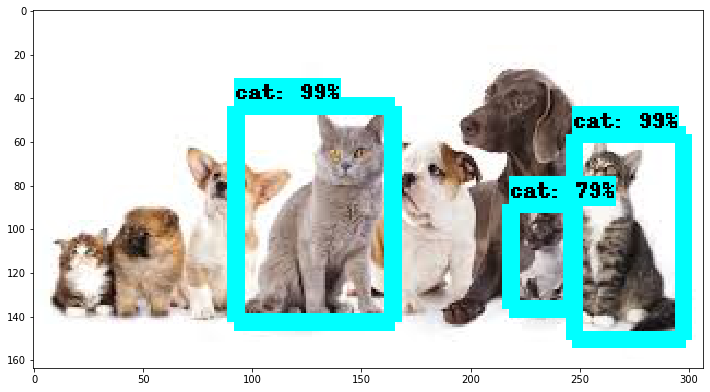

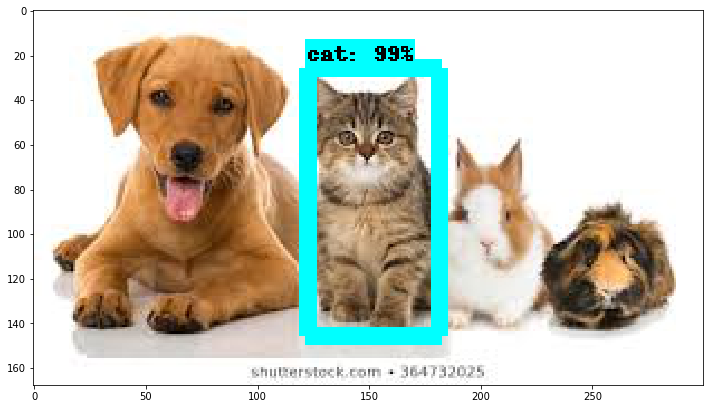

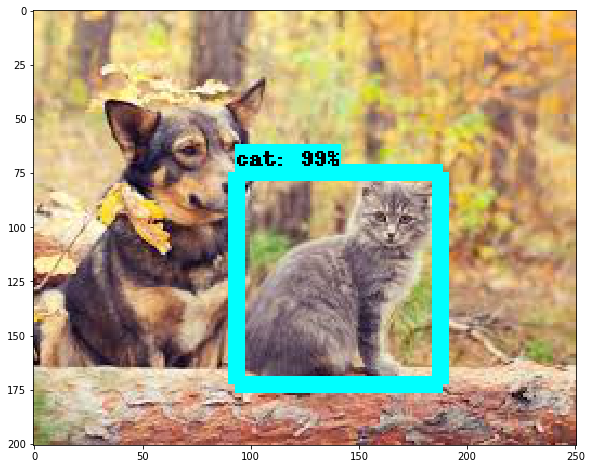

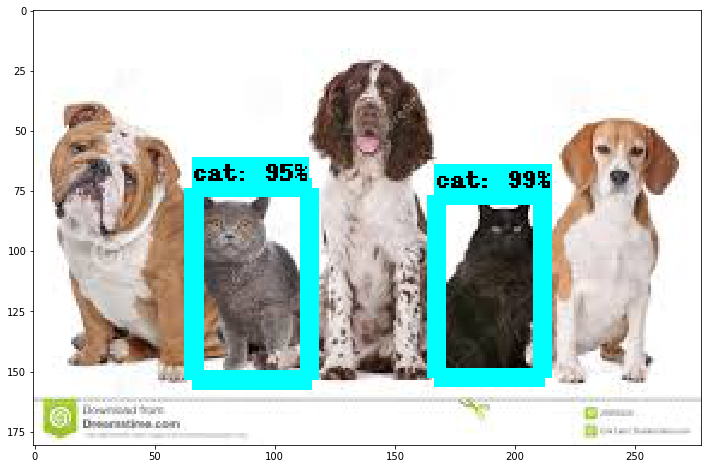

In [0]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  

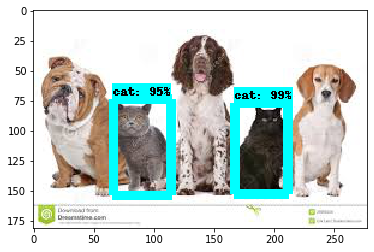

In [0]:
plt.imshow(image_np, cmap="hot")